# Task 1 (Coding)

The legend shall speak that this situation was in WW2. There are two actors in this story: a sniper and an officer. Both knew
about each other’s existence. There was a river between them. The officer was always sitting in a trench, but the sniper
knew his location and already calculated the distance to the target (L meters).
After a while cargo ship appeared, which blocked the direct vision of the trench. The officer decided to stand up to stretch his
legs. The sniper assumed that it might happened and make a shot, hitting the officer. Let’s check this story.
Formal description: Considering the bullet as a material point and taking into account its weight and the force of wind
resistance, we need to solve the following problems:
* Find the $\alpha$ (initial angle of overhang) that is required to hit the target. Output the value in degrees.
* At this angle, what is the maximum height the bullet will reach? Output the value.
* Plot $y(x)$, $F_c(t)$.
The problem should be solved in 2 ways. When air resistance is not taken into account, and when $F_c(v^2) = −k v \vec v$. The second problem can only be solved by numerical integration.

All specifications about Mosin rifle such as bullet weight m, bullet velocity at departure
$v_0$, effective firing distance are taken from the official documentation.
* $m$ = 13.6 g
* $L$ = 1500 m
* $k$ = 1.3 · 10−5
* $v_0$ = 870 m/ s. 

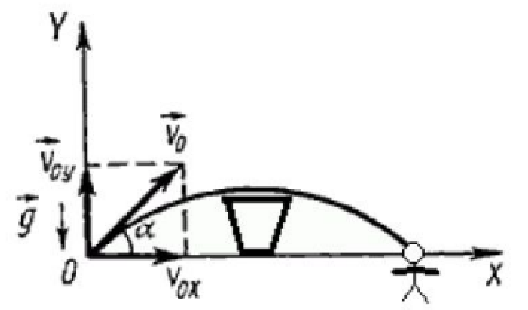

## Solution

### Without Air drag case

1. **R.O**: bullet (treat like particle) with planar motion
2. **Conditions**:
   1. Initial:
      * $t_0$ = 0
      * $x_0$ = 0
      * $\dot x$ = $v_0 \cdot cos(\alpha)$
      * $\ddot x$ = 0
      * $y_0$ = 0
      * $\dot y$ = $v_0 \cdot sin(\alpha)$
      * $\ddot y$ = $-g$
   2. Final:
      * $t_1$ = $?$
      * $x_1$ = $L$
      * $\dot x$ = $v_0 \cdot cos(\alpha)$, (when we don't have airdrag and traveling in projectile motion, $x$ component of bullet is $const$)
      * $\ddot x$ = 0
      * $y_1$ = 0
      * $\dot y$ = $?$
      * $\ddot y$ = $-g$
3. **Force analysis**:
   As we are not considering air drag, the only force acting to the particle is _gravitation_, let's say it $\vec G$.
4. **Solution**:

I will be using **2-nd Newtons law for inertial systems** method

$m \vec a = \sum_{}^{} \vec F $

We will analyze by axis. We don't have any force in OX, and gravitation in OY.
$$
\begin{cases}
   OX: m \ddot x = 0\\
   OY: m\ddot y = -mg
\end{cases}
$$

Integrate with respect to $t$

$$
\begin{cases}
   OX: \dot x = c_1\\
   OY: \dot y = -gt + c_3
\end{cases}
$$

Integrate one more time with respect to $t$:

$$
\begin{cases}
   OX: x = c_1 t + c_2\\
   OY: y = -\frac{1}{2}gt^2 + c_3 t + c_4
\end{cases}
$$

Now we put values from initial condition and solve to integration constants.


Given $t_0 = 0$

$$
\begin{cases}
   \dot x = c_1 = v_0 cos(\alpha)\\
   x = c_1 \cdot t + c_2 = 0\\
   \dot y = -g \cdot t + c_3 = v_o \sin(\alpha)\\
   y_0 = -\frac{1}{2}g \cdot t^2 + c_3 \cdot t + c_4 = 0
\end{cases}
$$

As a result we get:
$$
\begin{cases}
   OX: x = v_0 \cdot cos(\alpha) \cdot t\\
   OY: y = -\frac{1}{2}gt^2 + v_0 \cdot sin(\alpha) \cdot t
\end{cases}
$$,
where $L = 1500$, $v_0$ = 870, we need to solve for $\alpha$, $t$. Now, we will use Python to solve the system.

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

h0 = 0
v0 = 870
L = 1500
k = 1.3 * 10 ** (-5)
m = 13.6 / 1000

In [104]:
a, t = smp.symbols("a, t")
eq1 = smp.Eq(0, h0 + v0 * smp.sin(a) * t - 9.81 * t ** 2 / 2)
eq2 = smp.Eq(L, v0 * smp.cos(a) * t)

sol = list(filter(lambda s: s[t] > 0 , smp.solve([eq1, eq2], [a, t], dict=True)))

sol

for s in sol:
    hmax = v0 * smp.sin(s[a]) * (s[t] / 2) - 9.81 * (s[t] / 2) ** 2 / 2

    print(f"for sol {np.degrees(float(s[a]))} degrees/{s[a]} rad, t = {s[t]}sec max height is {hmax} m.")


for sol 0.556982768154159 degrees/0.00972118318116229 rad, t = 1.72421940096865sec max height is 3.64555853045729 m.
for sol 89.44301723184584 degrees/1.56107514361373 rad, t = 177.361649788719sec max height is 38574.3360928457 m.


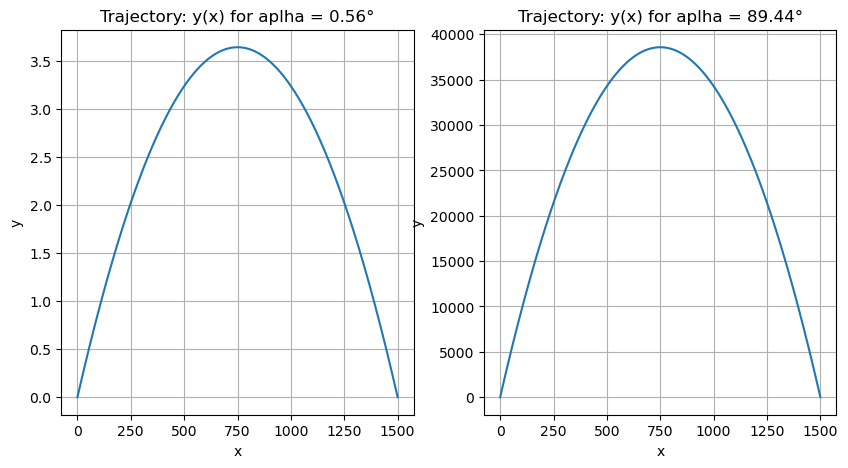

<Figure size 640x480 with 0 Axes>

In [105]:
# graph fist alpha value
time = np.linspace(0, float(sol[0][t]), 1000)
x_t = v0*np.cos(float(sol[0][a]))*time
y_t = -0.5*9.81*np.power(time, 2) + v0 * np.sin(float(sol[0][a])) * time

fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_t, y_t)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Trajectory: y(x) for aplha = {np.round(np.degrees(float(sol[0][a])), 2)}°')
plt.grid(True)


# graph fist alpha value
time = np.linspace(0, float(sol[1][t]), 1000)
x_t = v0*np.cos(float(sol[1][a]))*time
y_t = -0.5*9.81*np.power(time, 2) + v0 * np.sin(float(sol[1][a])) * time

# Plot y(x)
plt.subplot(1, 2, 2)
plt.plot(x_t, y_t)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Trajectory: y(x) for aplha = {np.round(np.degrees(float(sol[1][a])), 2)}°')
plt.grid(True)
plt.show()
plt.savefig("task1_1.png")


Now we have 2 possible solutions, where $\alpha$ is angle of shooting and $t$ is travel time of bullet. Now we need to find how high a ship can be in each cases of $\alpha$. For that it is enough to analyze $OY$, which is parabola. *Max heigh of ship* is same as *max height of bullet*. We know the trajectory of bullet. If we find *max height of bullet* from its trajectory, it means that we found *max height of the ship*.

Let's find max heigh of bullet, which has parabaloic trajectory. Parabola ($y = -\frac{1}{2}gt^2 + v_0 \cdot sin(\alpha) \cdot t$), reaches max point when $t_{max} = \frac{v_0 \cdot sin(\alpha)}{g}$, and max point is $y_{max} = y(t_{max})$

For $\alpha$ = 0.557°, $y_{max}$ = 3.65 m.

For $\alpha$ = 89.443°, $y_{max}$ = 38574.34 m.

### With airdrag case

1. **R.O**: bullet (treat like particle) with planar motion
2. **Conditions**:
   1. Initial:
      * $t_0$ = 0
      * $x_0$ = 0
      * $\dot x$ = $v_0 \cdot cos(\alpha)$
      * $\ddot x$ = 0
      * $y_0$ = 0
      * $\dot y$ = $v_0 \cdot sin(\alpha)$
      * $\ddot y$ = $-g$
   2. Final:
      * $t_1$ = $?$
      * $x_1$ = $L$
      * $\dot x$ = $?$, (air drag makes a deceleration in $x$ component)
      * $\ddot x$ = 0
      * $y_1$ = 0
      * $\dot y$ = $?$
      * $\ddot y$ = $?$, (air drag changes a $-g$ deceleration of bullet in $y$ component)
3. **Force analysis**:
   As we are considering air drag, thus we have $\vec F_c = -kv \vec v$ and _gravitation_ $\vec G$.
4. **Solution**:
   
   
   I will be using **2-nd Newtons law for inertial systems** method.

   $m \vec a = \sum_{}^{} \vec F $

   We will analyze by axis. We don't have any force in OX, and gravitation in OY.
   $$
   \begin{cases}
      OX: m \ddot x = -k(\dot x^2 + \dot y^2)^{0.5}\dot x\\
      OY: m\ddot y = -mg -k(\dot x^2 + \dot y^2)^{0.5}\dot y
   \end{cases}
   $$


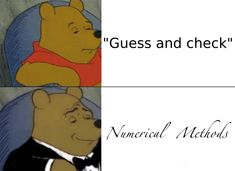

we will solve system numerically

[0.03199999999999998, 1.197999999999999]
Maximum height reached: 18.633922413020798 units
Maximum height reached: 2041.3790637603233 units


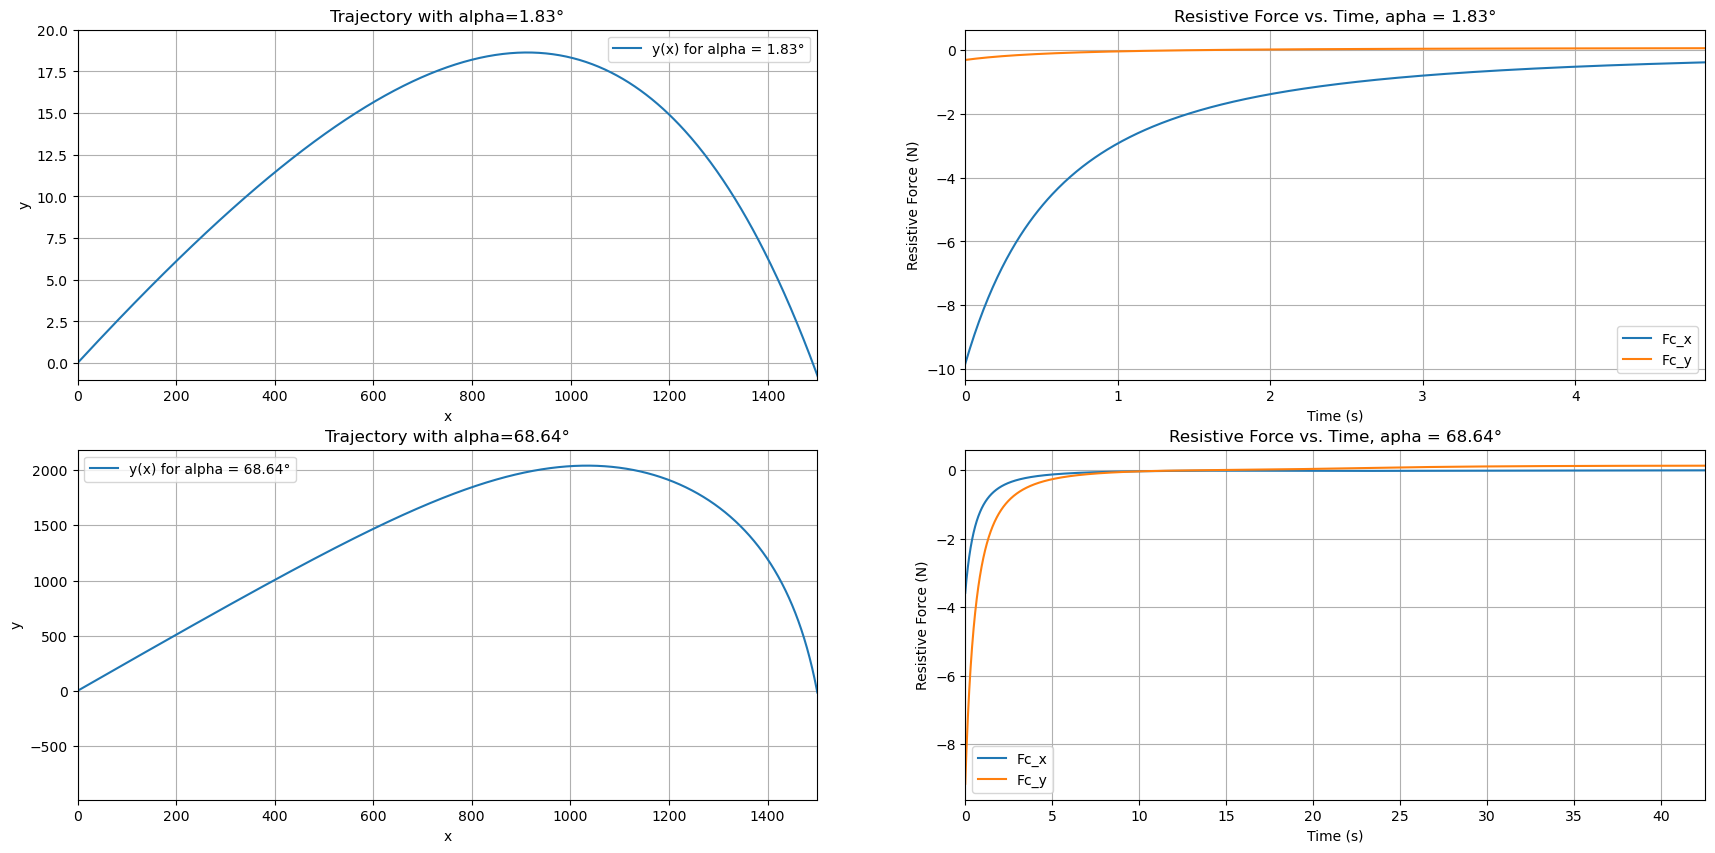

In [106]:
from scipy.integrate import odeint 

g = 9.81
alphas = np.arange(0.01, np.pi, 0.001)
alphas_s = np.linspace(0, np.pi, 20)

def nonliear_ode(X, t):

    x, vx, y, vy = X
    # Nonlinear dynamics
    dx = np.array([vx,
                   -k*np.sqrt(vx**2+vy**2)*vx/m,
                   vy,
                   -k*np.sqrt(vx**2+vy**2)*vy/m - g])

    return dx

t = np.arange(0, 50, 0.01)
distances = []

for alpha in alphas:
  X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
  x_snl = odeint(nonliear_ode, X0, t)
  t_cross = np.where(np.diff(np.sign(x_snl[:, 2])))[0]
  distances.append(x_snl[t_cross[1], 0])
distances = np.array(distances)



alpha_target = [alphas[i] for i in np.where(np.diff(np.sign(distances - L)))[0]]
print(alpha_target)

fig = plt.figure(figsize=(21, 10))

plt.subplot(2, 2, 1)
X0 = np.array([0, v0*np.cos(alpha_target[0]), 0, v0*np.sin(alpha_target[0])])
x_snl = odeint(nonliear_ode, X0, t)
plt.plot(x_snl[:, 0], x_snl[:, 2], label=f'y(x) for alpha = {np.round(np.degrees(alpha_target[0]), 2)}°')
plt.title(f'Trajectory with alpha={np.round(np.degrees(alpha_target[0]), 2)}°')
plt.xlim(0, 1500)
plt.ylim(-1, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Find the time t when the projectile's x-coordinate reaches 1500
t_index = np.where(x_snl[:, 0] >= 1500)[0][0]
t_1500 = t[t_index]

# Find the maximum value of y
max_y = np.max(x_snl[:, 2])
print("Maximum height reached:", max_y, "units")

# Calculate resistive force F_c for first alpha
speeds = np.sqrt(x_snl[:, 1]**2 + x_snl[:, 3]**2)
Fc_x = -k * speeds * x_snl[:, 1]
Fc_y = -k * speeds * x_snl[:, 3]
plt.subplot(2, 2, 2)
plt.xlim(0, t_1500 + 1)
plt.plot(t, Fc_x, label='Fc_x')
plt.plot(t, Fc_y, label='Fc_y')
plt.xlabel('Time (s)')
plt.ylabel('Resistive Force (N)')
plt.title(f'Resistive Force vs. Time, apha = {np.round(np.degrees(alpha_target[0]), 2)}°')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
X0 = np.array([0, v0*np.cos(alpha_target[1]), 0, v0*np.sin(alpha_target[1])])
x_snl = odeint(nonliear_ode, X0, t)
plt.plot(x_snl[:, 0], x_snl[:, 2], label=f'y(x) for alpha = {np.round(np.degrees(alpha_target[1]), 2)}°')
plt.xlim(0, 1501)
plt.title(f'Trajectory with alpha={np.round(np.degrees(alpha_target[1]), 2)}°')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()

# Find the time t when the projectile's x-coordinate reaches 1500
t_index = np.where(x_snl[:, 0] >= 1500)[0][0]
t_1500 = t[t_index]

# Find the maximum value of y
max_y = np.max(x_snl[:, 2])
print("Maximum height reached:", max_y, "units")

# Calculate resistive force F_c for second alpha
speeds = np.sqrt(x_snl[:, 1]**2 + x_snl[:, 3]**2)
Fc_x = -k * speeds * x_snl[:, 1]
Fc_y = -k * speeds * x_snl[:, 3]
plt.subplot(2, 2, 4)
plt.xlim(0, t_1500 + 1)
plt.plot(t, Fc_x, label='Fc_x')
plt.plot(t, Fc_y, label='Fc_y')
plt.xlabel('Time (s)')
plt.ylabel('Resistive Force (N)')
plt.title(f'Resistive Force vs. Time, apha = {np.round(np.degrees(alpha_target[1]), 2)}°')
plt.legend()
plt.grid()
plt.savefig("task1_2.png")

## Answers

Without drag:
1. $\alpha$ = 0.557°, $y_{max}$ = 3.65 m.
2. $\alpha$ = 89.443°, $y_{max}$ = 38574.34 m.
3. 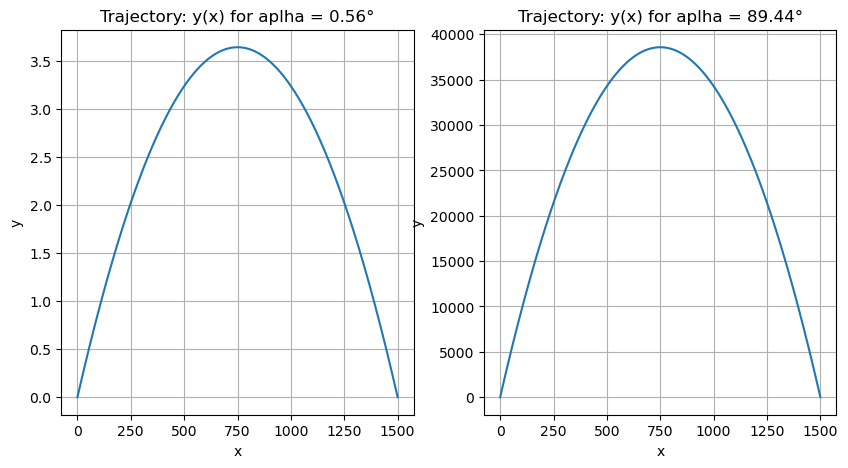
With drag:
1. $\alpha$ = 1.83°, $y_{max}$ = 18.63 m.
2. $\alpha$ = 68.64°, $y_{max}$ = 2041.38 m.
3. ![](task1_2.png)

# Task 2 (Coding)

## Descriptoin

A particle M (mass m) is moving inside of the cylindrical channel of the moving object D. The object $D$ has a radius $r$. No friction between M and D. Determine the equation of the relative motion of this particle $x = f(t)$. Also you need to find the pressure force the particle acting on the channel wall. At the end, you should provide:
1. simulate this mechanism (obtain all positions);
2. show all acceleration components, inertial forces, gravity force and $N$;
3. plot of the particle $x(t)$, till the time, while point won’t leave the channel;
4. plot $N(t)$ , till the time, while point won’t leave the channel.

Needed variables:
$m = 0.02$, $\omega$ = $\pi$, $a$ = 60, $\alpha$ = 45◦;

Initial conditions: $t_0$ = 0, $x_0$ = 0, $\dot x_0$ = 0.4.

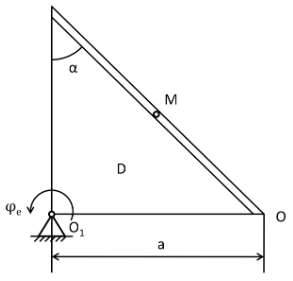

## Solution

1. RO: particle M - translatory motion, disk A - rotation

2. Conditions
$$
\begin{matrix}
\text{Initial} & \text{Final}\\
t_0 = 0 & ?\\
x = 0 & OO_2\\
\dot x = 0.4 & ?\\
\ddot x = 0 & ?
\end{matrix}
$$

3. Force analysis: Forces are shown in the picture

<img src="./task2_1.jpg" alt="Drawing" style="width: 500px;"/>
<img src="./task2_1_2.jpg" alt="Drawing" style="width: 500px;"/>

* Gravitation force
* Inertia due to corriolis force
* Inertia due to centrepetal force

4. Solution
   
I will be using **2-nd Newtons law for non-inertial systems** method.

which is 
$$
\begin{equation}
m\vec a_r = \vec G + \vec \Phi _{c} + \vec \Phi _{tr} + \vec N_y + \vec N_z 
\end {equation}
$$

where $\vec \Phi$ where is inertia force, $\vec N_z$, $\vec N_y$ components of normal force, $\vec G$ gravity.

So, let's project equation $(1)$ into $x$-axis from the moving coordinate system $OXYZ$.

$O_1M = R$, we find it from **cosine law** for triangle $O_1 O M$

$x = OM$

$O_1O = 60$

$\gamma$ is angle between lines $O_1 M$ and $G$ gravity vector.

$$
\begin{cases}
m \ddot x = - G \cdot cos(45° + \frac{180wt}{\pi}) - \Phi _{tr} \cdot cos(135° - \frac{180wt}{\pi} - \gamma)\\
R = \sqrt{O_1 O^2 + x^2 - 2 O_1 O \cdot x \cdot cos(45°)}\\
\gamma = arccos(\frac{R^2 + x^2 -O_1O^2}{2 \cdot R \cdot x}) - 45° - \frac{180wt}{\pi}
\end{cases}
= 
\begin{cases}
m \ddot x = - m \cdot g \cdot cos(45° + \frac{180wt}{\pi}) - m \cdot w^2 \cdot R \cdot cos(135° - \frac{180wt}{\pi} - \gamma)\\
R = \sqrt{60^2 + x^2 - 120 \cdot x \cdot cos(45°)}\\
\gamma = arccos(\frac{R^2 + x^2 - 60^2}{2 \cdot R \cdot x}) - 45° - \frac{180wt}{\pi}
\end{cases}
$$

I don't know how to solve this DE, but if we solve we get $x$ - motion along the X axis on moving coordinate system $OXYZ$.

To find $\vec N_y$, $\vec N_x$, we need to project $(1)$ onto $Y$ and $Z$ axes:

$$
\begin{cases}
OY: m \ddot y = -G \cdot sin(45° + \frac{180wt}{\pi}) + \Phi _{c} + \Phi _{tr} \cdot sin(135° - \gamma - \frac{180wt}{\pi}) + N_y\\
OZ: m \ddot z = N_z
\end{cases}
$$

$$
\begin{cases}
OY: N_y = G \cdot sin(45° + \frac{180wt}{\pi}) - \Phi _{c} - \Phi _{tr} \cdot sin(135° - \gamma - \frac{180wt}{\pi})\\
OZ: N_z = 0
\end{cases}
$$

$$
\begin{equation*}
\vec N =
\begin{bmatrix}
N_x\\
N_y\\
N_z
\end{bmatrix} = 
\begin{bmatrix}
0\\
G \cdot sin(45° + \frac{180wt}{\pi}) - \Phi _{c} - \Phi _{tr} \cdot sin(135° - \gamma - \frac{180wt}{\pi})\\
0
\end{bmatrix}
\end{equation*}
$$

## Answers

I have solutions without exact values. I could not solve the differential equation I got. That's why I could not do simulation.

Find $x(t)$ from

$$
\begin{cases}
\ddot x = - g \cdot cos(45° + \frac{180wt}{\pi}) - w^2 \cdot R \cdot cos(135° - \frac{180wt}{\pi} - \gamma)\\
R = \sqrt{60^2 + x^2 - 120 \cdot x \cdot cos(45°)}\\
\gamma = arccos(\frac{R^2 + x^2 - 60^2}{2 \cdot R \cdot x}) - 45° - \frac{180wt}{\pi}
\end{cases}
$$

Then you can get $\vec N$

$$
\begin{equation*}
\vec N =
\begin{bmatrix}
N_x\\
N_y\\
N_z
\end{bmatrix} = 
\begin{bmatrix}
0\\
G \cdot sin(45° + \frac{180wt}{\pi}) - \Phi _{c} - \Phi _{tr} \cdot sin(135° - \gamma - \frac{180wt}{\pi})\\
0
\end{bmatrix}
\end{equation*}
$$

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1355000959337D-04   r2 =                  NaN


/tmp/ipykernel_99036/4192581272.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.arccos((R(x)**2 + x**2 - 60**2)/(2*R(x)*x)) - alpha - w*t
/home/rizo/anaconda3/envs/dl/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


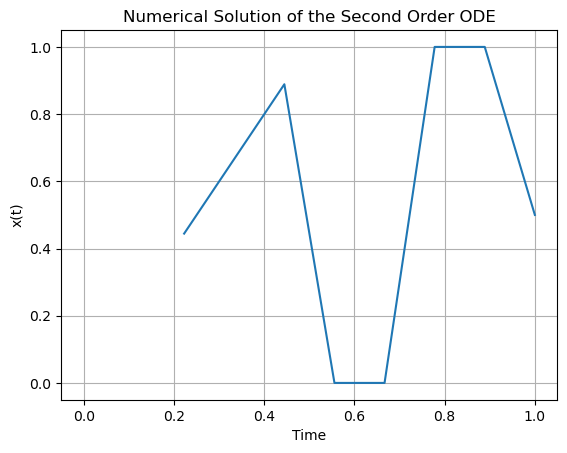

In [26]:
alpha = np.pi/4
w = np.pi
g = 9.81
def R(x):
    return np.sqrt(60**2 + x**2 - 120*x*np.cos(alpha))

def gamma(x, t):
    return np.arccos((R(x)**2 + x**2 - 60**2)/(2*R(x)*x)) - alpha - w*t

# Function defining the system of first-order ODEs
def dXdt(X, t):
    x, v = X
    dydt = v
    dvdt = -g*np.cos(alpha + w*t) - np.cos(3*np.pi/4 - w*t - gamma(x, t)) * R(x) * w**2
    return [dydt, dvdt]

# Initial conditions
X0 = [0.0, 0.4]  # Initial position and velocity

# Time points for integration
t = np.linspace(0, 1, 10)  # Time from 0 to 10 seconds

# Solve the system of first-order ODEs
X = odeint(dXdt, X0, t)

# Extract y and its derivative from the solution
x_solution = X[:, 0]

# Plot the solution
plt.plot(t, x_solution)
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Numerical Solution of the Second Order ODE')
plt.grid(True)
plt.show()
